In [20]:
pip install numpy requests nlpaug pandas torchvision tensorflow cmapy scikit-learn tqdm torch librosa matplotlib

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install opencv-python==4.2.0.34

Note: you may need to restart the kernel to use updated packages.


In [22]:
class AudioLoader:
    @staticmethod
    def load_audio(file_path, sr=4000):
        try:
            import librosa
        except ModuleNotFoundError:
            raise ModuleNotFoundError('Missed librosa library. Install import librosa by `pip install librosa`')

        return librosa.load(file_path, sr=sr)

    @staticmethod
    def load_mel_spectrogram(file_path, n_mels=50, n_fft=512, hop_length=256):
        try:
            import librosa
        except ModuleNotFoundError:
            raise ModuleNotFoundError('Missed librosa library. Install import librosa by `pip install librosa`')

        audio, sampling_rate = AudioLoader.load_audio(file_path)
        return librosa.feature.melspectrogram(y=audio, sr=sampling_rate, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)


In [23]:
try:
    import librosa
    import librosa.display
    import matplotlib.pyplot as plt
except ImportError:
    # No installation required if not using this function
    pass

import numpy as np


class AudioVisualizer:
    @staticmethod
    def wave(title, audio, sample_rate):
        plt.figure(figsize=(8, 4))
        librosa.display.waveplot(audio, sr=sample_rate)
        plt.title(title)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def freq_power(title, audio, sample_rate, aug_audio=None):
        audio_fft = np.fft.rfft(audio)
        audio_fft /= len(audio_fft)

        freq_bins = np.arange(0, len(audio_fft), 1.0) * (sample_rate * 1.0 / len(audio_fft))
        plt.plot(freq_bins / 1000, 10 * np.log10(audio_fft), color='#FF0000', linewidth=0.02)

        if aug_audio is not None:
            aug_audio_fft = np.fft.rfft(aug_audio)
            aug_audio_fft /= len(aug_audio_fft)

            aug_freq_bins = np.arange(0, len(aug_audio_fft), 1.0) * (sample_rate * 1.0 / len(aug_audio_fft))
            plt.plot(aug_freq_bins / 1000, 10 * np.log10(aug_audio_fft), color='#000000', linewidth=0.02)

        plt.title(title)
        plt.xlabel('Frequency (k Hz)')
        plt.ylabel('Power (dB)')
        plt.tight_layout()
        plt.show()

    @staticmethod
    def spectrogram(title, spectrogram, save_path=None):
        plt.figure(figsize=(8, 4))
        librosa.display.specshow(
            librosa.power_to_db(spectrogram, ref=np.max), y_axis='mel', fmax=8000, x_axis='time', cmap='viridis')
        plt.colorbar(format='%+10.0f dB')
        plt.title(title)
        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()
        plt.close()

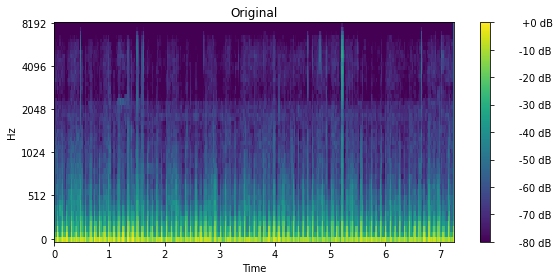

In [30]:
import torchvision
from torchvision.transforms import transforms, ToTensor
import librosa
import torch 
import numpy as np
import matplotlib.pyplot as plt
import os
from torchvision import datasets 
from PIL import Image
path = r'C:\Users\phitt\OneDrive\Desktop\MY project\ICBHI DATASET\ICBHI_final_database\ICBHI_final_database\101_1b1_Al_sc_Meditron.wav'
data = AudioLoader.load_mel_spectrogram(path)
AudioVisualizer.spectrogram("Original", data, save_path="images_data\spectrogram.png")

In [34]:
from PIL import Image

# load image in RGB mode (png files contains additional alpha channel)
img = Image.open(r'C:\Users\phitt\spcectrogram\spectrogram_augmenter\images_data\spectrogram.png').convert('RGB')

# set up transformation to resize the image
resize = transforms.Resize([224, 224])
img = resize(img)
to_tensor = transforms.ToTensor()

# apply transformation and convert to Pytorch tensor
tensor = to_tensor(img)
# torch.Size([3, 224, 224])

# add another dimension at the front to get NCHW shape
tensor = tensor.unsqueeze(0)
# torch.Size([1, 3, 224, 224])

In [35]:
print(tensor.shape)

torch.Size([1, 3, 224, 224])
